# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# importing dataset

In [2]:
df_titanic=pd.read_csv(r'C:\Users\Rohan\OneDrive\Desktop\titanic.csv')

In [3]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df_titanic['Embarked'].nunique()

3

In [4]:
df_titanic.shape

(891, 12)

## there are 891 rows and 12 columns

In [5]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

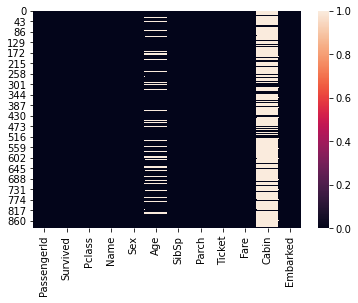

In [11]:
data=df_titanic.isnull()
ax  =sns.heatmap(data)

# there are null values in the dataset

# boxplot for checking outliers

PassengerId       AxesSubplot(0.125,0.826831;0.227941x0.053169)
Survived       AxesSubplot(0.398529,0.826831;0.227941x0.053169)
Pclass         AxesSubplot(0.672059,0.826831;0.227941x0.053169)
Age               AxesSubplot(0.125,0.763028;0.227941x0.053169)
SibSp          AxesSubplot(0.398529,0.763028;0.227941x0.053169)
Parch          AxesSubplot(0.672059,0.763028;0.227941x0.053169)
Fare              AxesSubplot(0.125,0.699225;0.227941x0.053169)
dtype: object

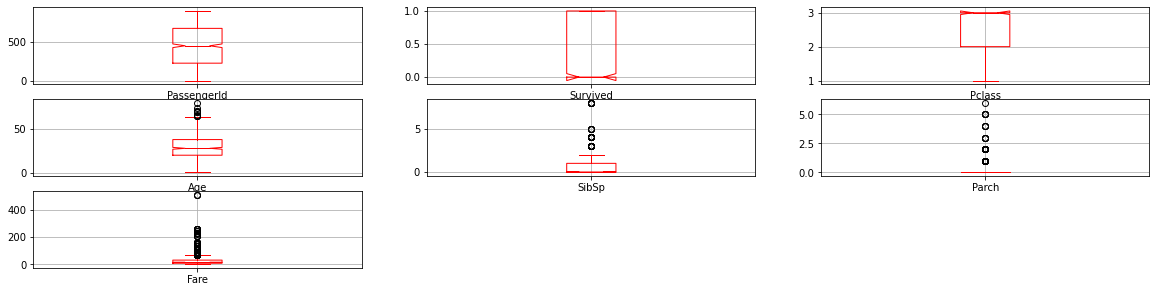

In [12]:
df_titanic.plot(kind='box',subplots=True,layout=(12,3),figsize=(20,20),grid=True,notch=True,legend=True,color='red')

###  Outliers data points will have significant impact on the mean and hence, in such cases, it is not recommended to use mean for replacing the missing values. Using mean value for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use mea

In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_titanic['Embarked']=LE.fit_transform(df_titanic['Embarked'])
df_titanic['Cabin']=LE.fit_transform(df_titanic['Cabin'])
df_titanic['Sex']=LE.fit_transform(df_titanic['Sex'])

In [22]:
df_titanic=df_titanic.fillna(df_titanic.median())

In [23]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### now there are no null values in the dataset

In [25]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

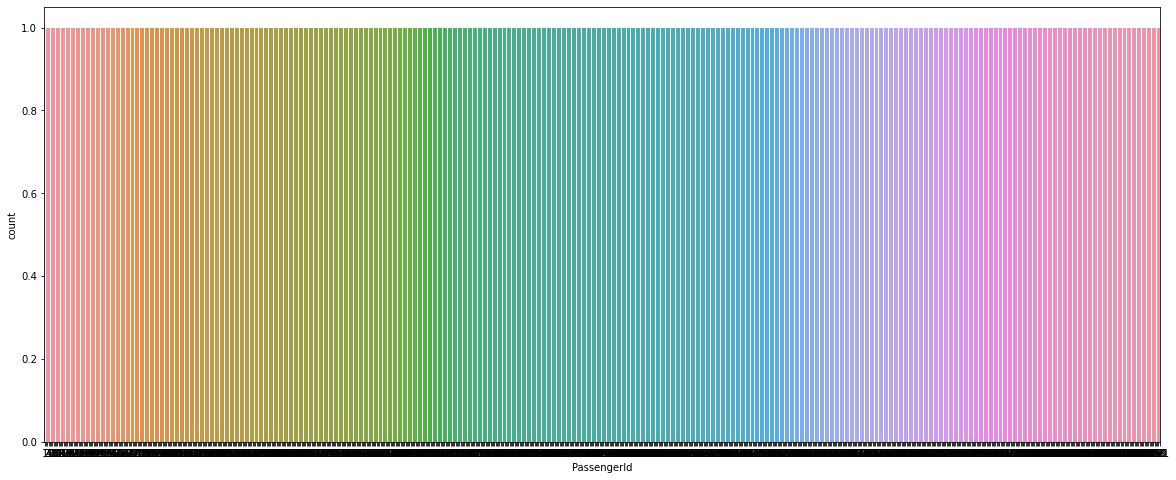

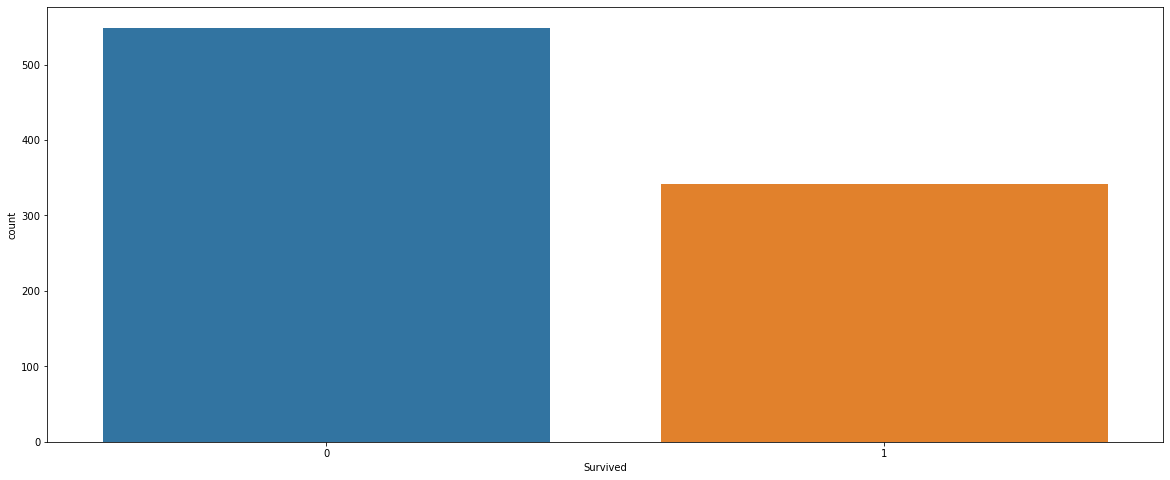

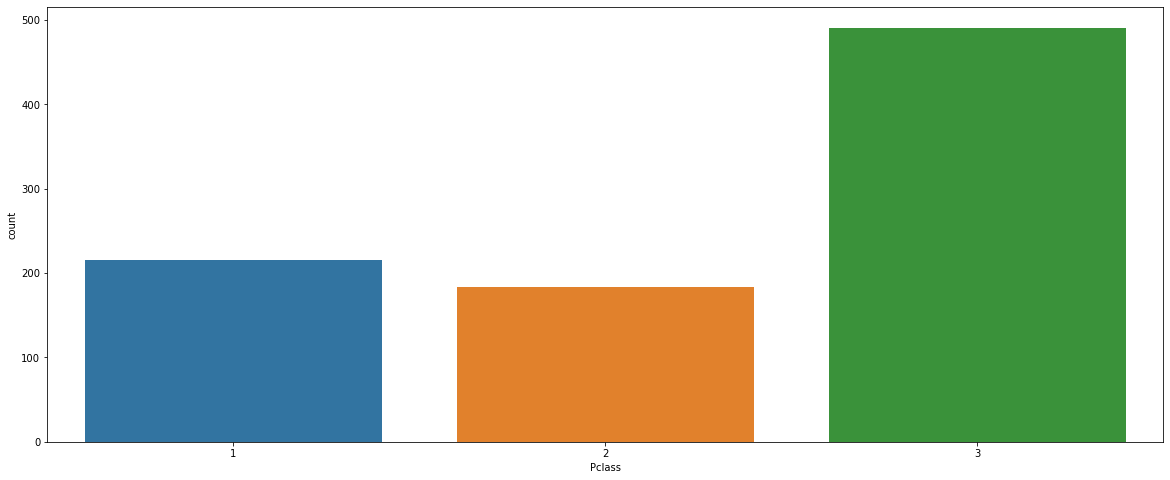

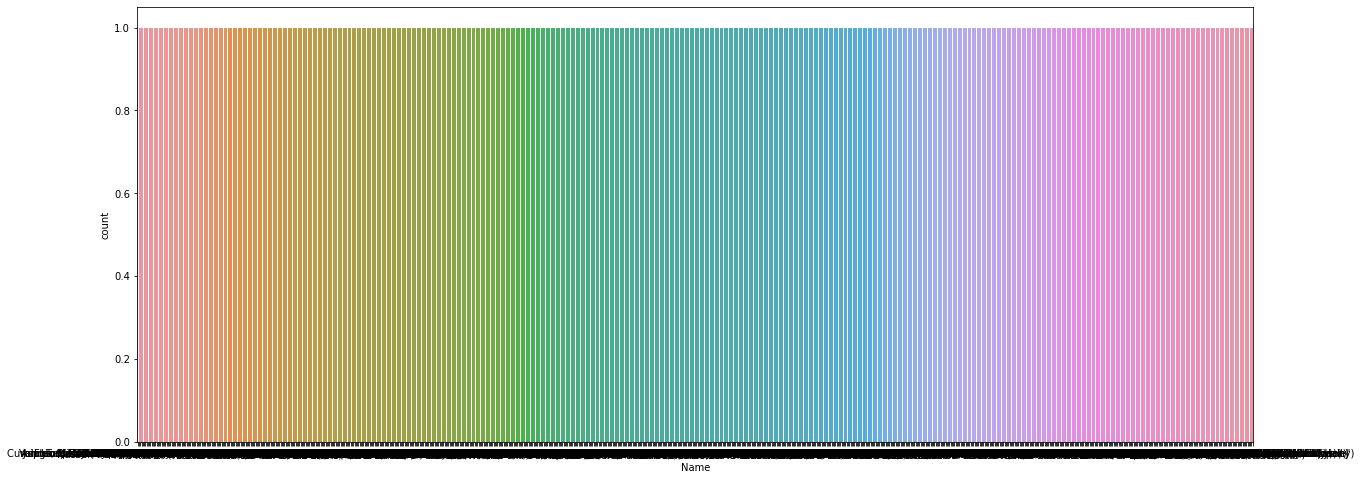

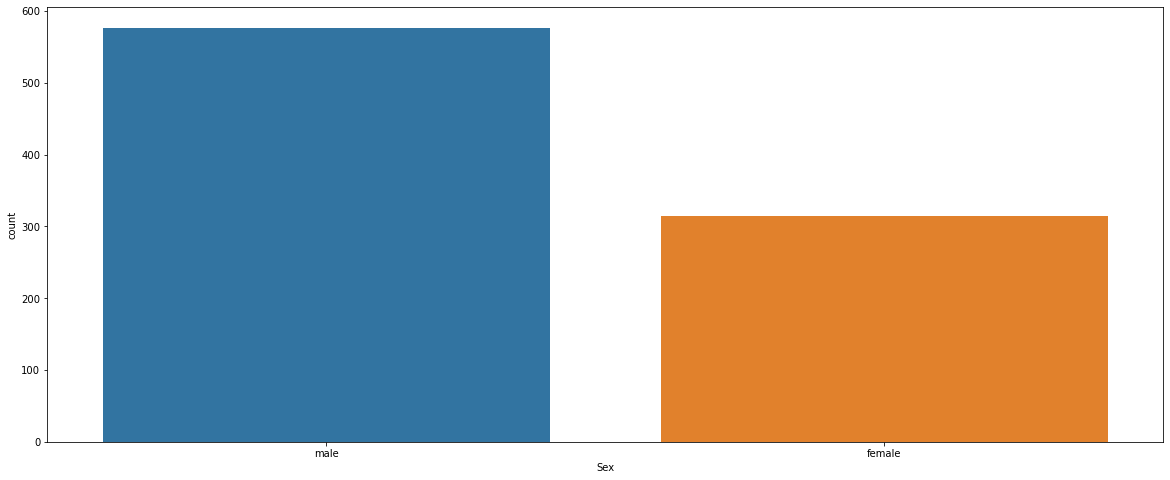

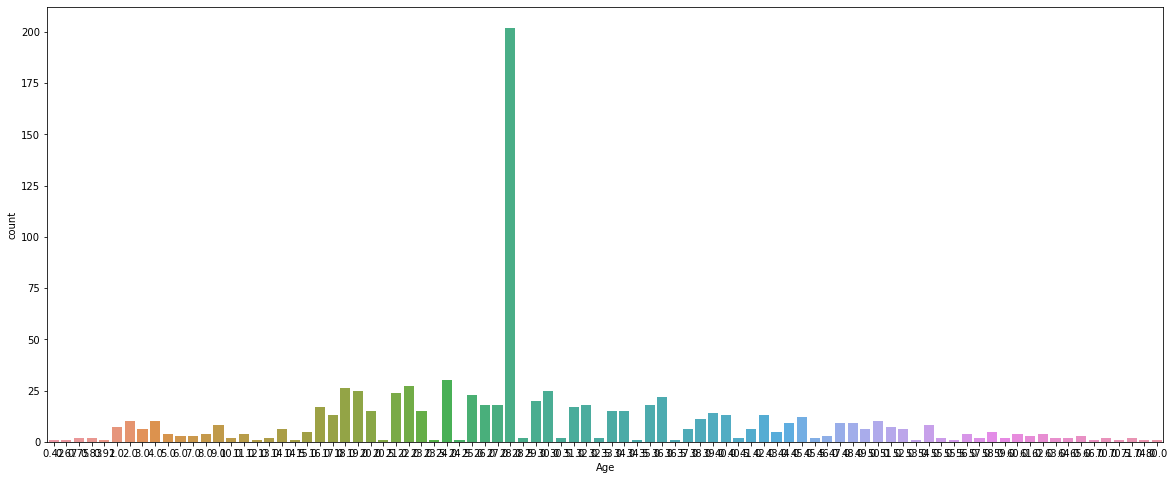

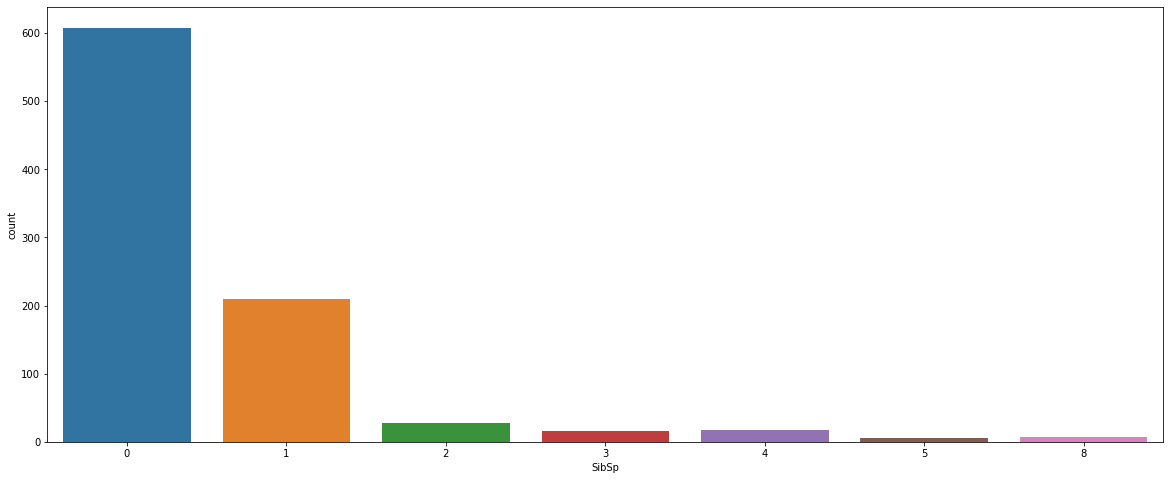

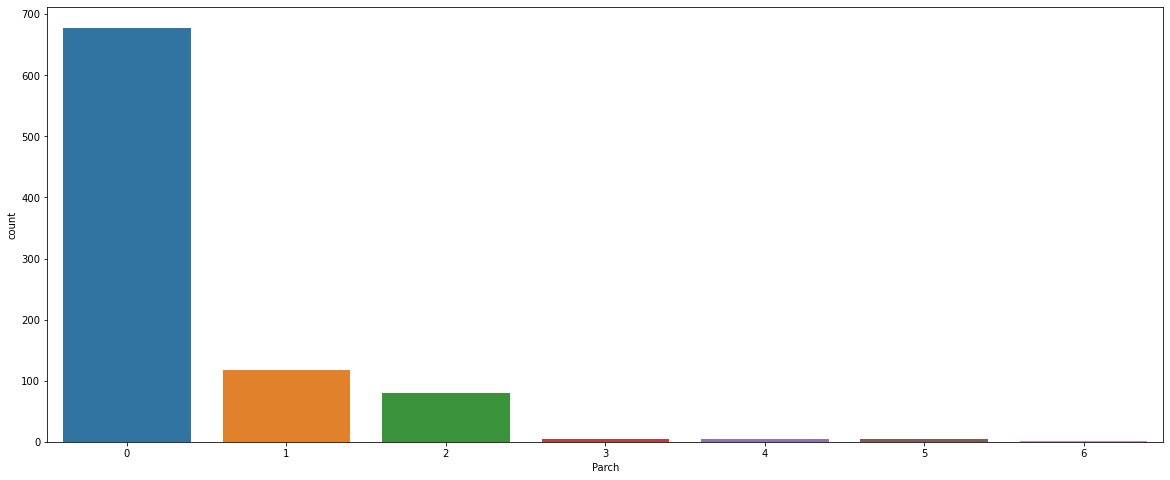

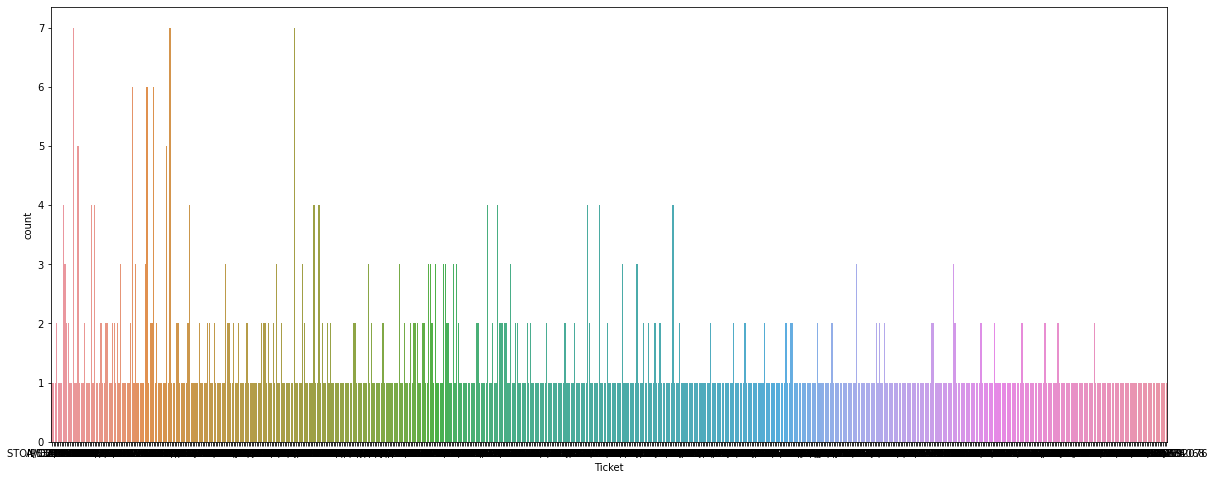

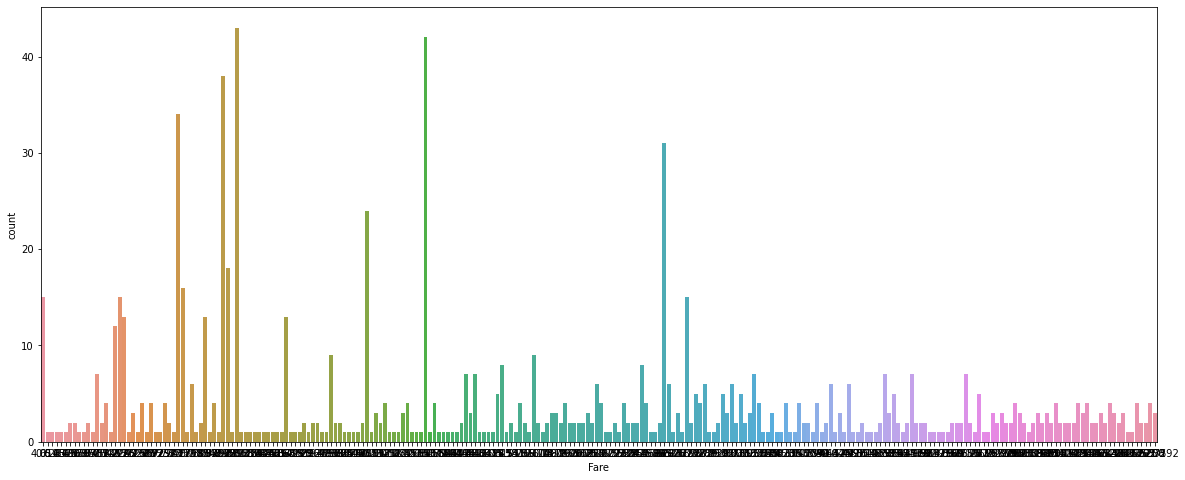

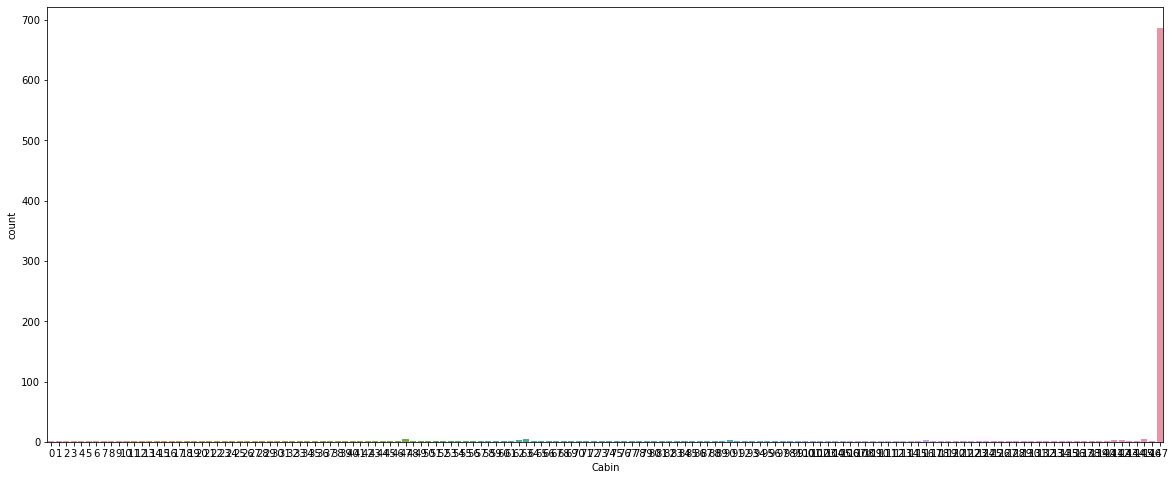

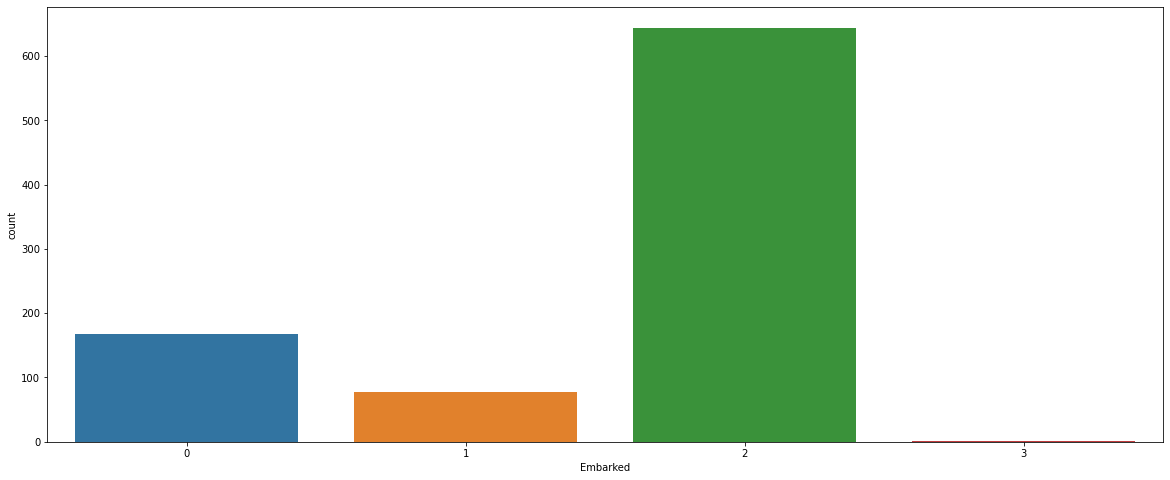

In [27]:
list=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_titanic)
    plt.show()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Cabin'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

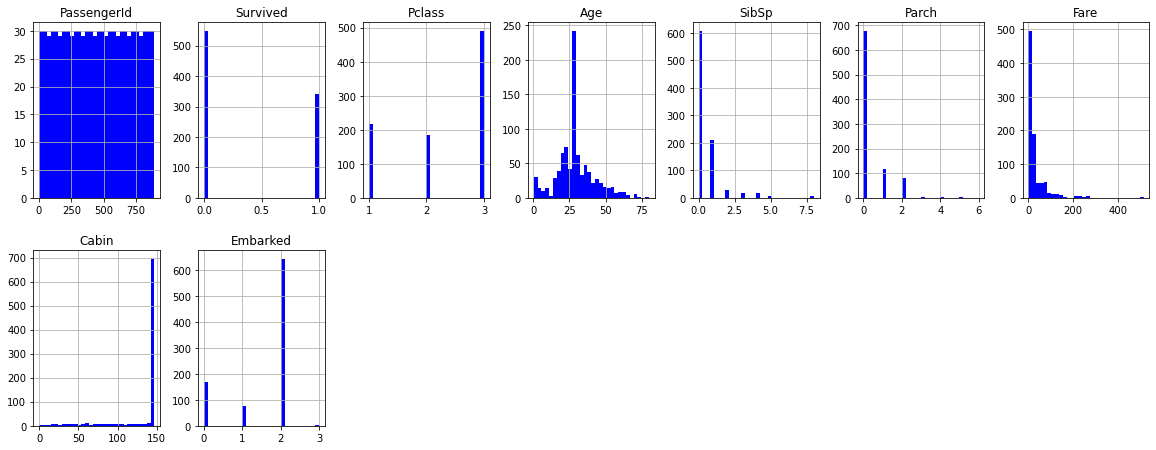

In [31]:
df_titanic.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

In [32]:
df_titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [33]:
df_titanic.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [34]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

In [46]:
for i in df_titanic.drop(['Name','Ticket'],axis=1).columns:
    if df_titanic.skew().loc[i]>0.55:
        df_titanic[i]=np.log1p(df_titanic[i])

In [47]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          1.002587
Parch          1.354107
Fare           0.394928
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

In [51]:
df_titanic=df_titanic.drop(['Name','Ticket'],axis=1)

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_titanic))
z.shape

(891, 10)

In [55]:
df_titanicnew=df_titanic[(z<3).all(axis=1)]
print(df_titanic.shape)
print(df_titanicnew.shape)

(891, 10)
(845, 10)


In [56]:
loss_percent=((891-845)/891)*100
loss_percent

5.16273849607183

# nearly 5.16 data is lost

# bivariant analysis

<AxesSubplot:xlabel='Survived', ylabel='Age'>

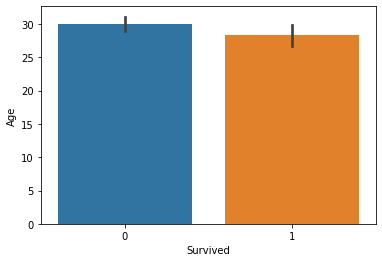

In [61]:
# relation between survived and sex
sns.barplot(x="Survived",y="Age",data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

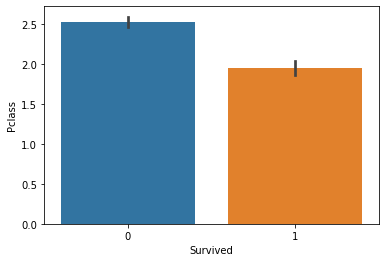

In [62]:
# relation between survived and pclass
sns.barplot(x="Survived",y="Pclass",data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

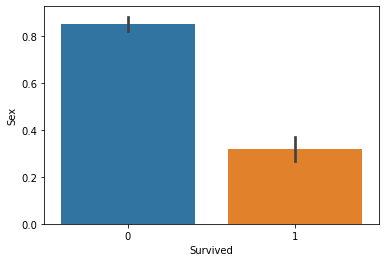

In [64]:
# relation between survived and sex
sns.barplot(x="Survived",y="Sex",data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

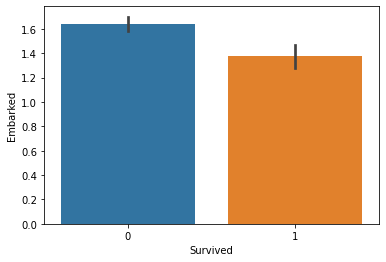

In [65]:
# relation between survived and sex
sns.barplot(x="Survived",y="Embarked",data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

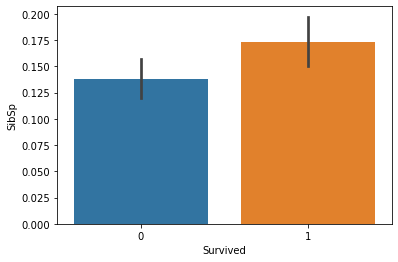

In [66]:
# relation between survived and sex
sns.barplot(x="Survived",y="SibSp",data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

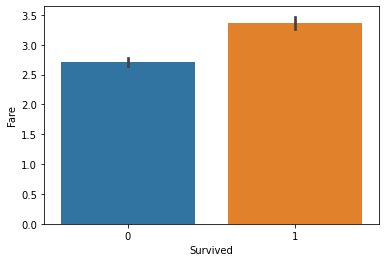

In [67]:
# relation between survived and sex
sns.barplot(x="Survived",y="Fare",data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

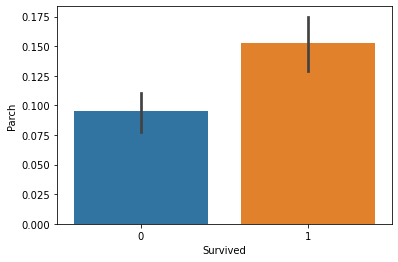

In [68]:
# relation between survived and sex
sns.barplot(x="Survived",y="Parch",data=df_titanic)

# model Training

In [70]:
x=df_titanicnew.drop("Survived",axis=1)
x.shape

(845, 9)

In [71]:
y=df_titanicnew["Survived"]
y.shape

(845,)

In [72]:
# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


# Ensemble Techniques...
# from sklearn.ensemble import GradientBoostingClassifierx apviorn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance....
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
#........Defining Instances For Differnt Models and putting best parameters in them.......
lr=LogisticRegression()
DT=DecisionTreeClassifier()
GBC=GradientBoostingClassifier()
RF=RandomForestClassifier()
AD=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [74]:
#   Putting Scikit-Learn machine learning Models in a list so that it can be used for 
#   further evaluation in loop.
models=[]
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',DT))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(("ExtraTreesClassifier",ETC))

In [76]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** LogisticRegression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  71 is: 0.8402366863905325


Learning Score :  0.7707100591715976
Accuracy Score :  0.8402366863905325
Cross Val Score :  0.7798319327731092
roc auc score :  0.8182692307692307


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.84      0.72      0.78        65

    accuracy                           0.84       169
   macro avg       0.84      0.82      0.83       169
weighted avg       0.84      0.84      0.84       169



Confusion Matrix:
 [[95  9]
 [18 47]]





*************************** DecisionTreeClassifier *****************************


DecisionTreeClassifier()


Max Accuracy Score corresponding to Random State  64 is: 0.8224852071005917


Learning Score :  1.0
Accuracy Score :  0.834319526627219
Cross Val Score :  0.7482352

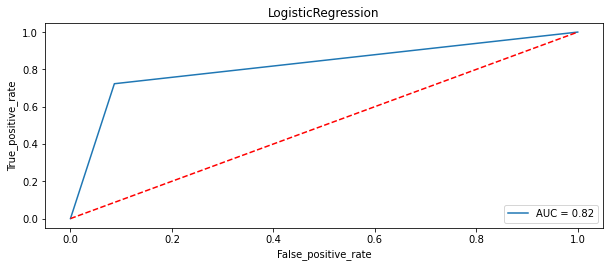

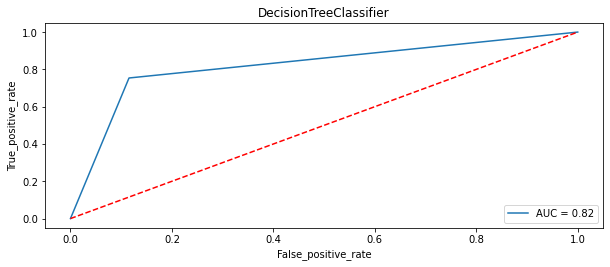

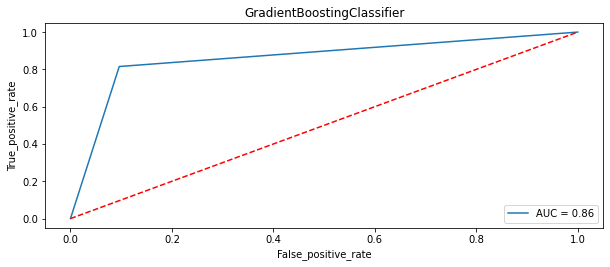

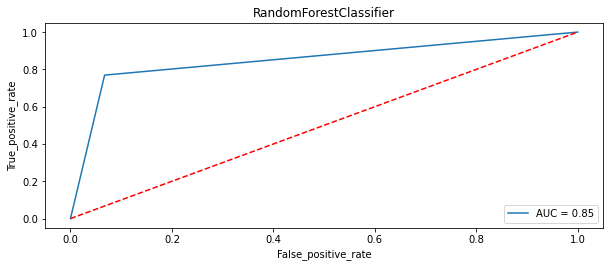

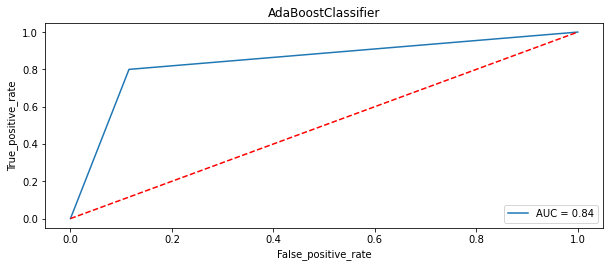

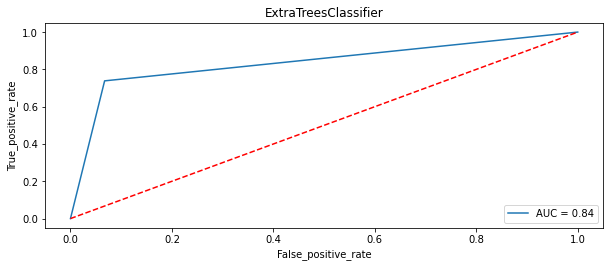

In [77]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    #................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

# random forest classifier is giving the best accuracy

# hyperparameter tuning using gridsearchcv

In [78]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,n_jobs=-1,refit=True)
    clf.fit(x_train,y_train)
    print(clf.best_params_)

In [79]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500],'max_features': ['auto', 'sqrt', 'log2'],'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters,'roc_auc')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}


In [80]:
rf=RandomForestClassifier(n_estimators=200,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6)
max_acc_score(rf,x,y)

Max Accuracy Score corresponding to Random State  45 is: 0.8698224852071006




45

In [81]:
import joblib
joblib.dump(rf,"titanic analysis.obj")

['titanic analysis.obj']